# Project: Analysis of the NACA Series Airfoils

## Dian Liu

## Background

The airfoil has an important effect on the lift-to-drag ratio of wings. At the beginning of the aircraft development, the airfoil was designed to imitate the winged shape of some birds. Wright Brothers and A.Satos-Dumont's first plane was invented by following this principle. This type of airfoil has large drag though it has a great lift. Thus, the lift-to-drag ratio of wing is still very low. During the subsequent studies and experiments, the engineers were able to slowly improve the performance of the wing by analyzing the airfoil. In this period, the NACA series airfoils developed by the US National Aviation Advisory Committee had the greatest impact on airfoil development.

## Purpose

Through the analysis process of the NACA series airfoils, we can have a more comprehensive and deeper understanding of the performance of the wings and the factors that affect the performance of the airfoil.

## The relevant information

### Quote from Wikipedia and Aircraft Design: A Systems Engineering Approach(2012), chapter 5

For the Four-digit NACA airfoils: The first digit indicates the maximum camber in percentage of the chord, the second indicates the position of the maximum camber in tenths of chord, and the last two numbers provide the maximum thickness of the airfoil in percentage of chord.

For the Five-digit NACA airfoils: The first digit represents the 2/3 of ideal lift coefficient in tenths. The second digit indicates the position of maximum camber in two hundredths of chord. If the third digit is 0, that means this airfoil is a symmetrical airfoil section. The last two digits represent the maximum thickness-to-chord ratio. 

For the 6-series NACA airfoils: The first digit is always 6, the series designation. The second digit shows the chord position of minimum pressure in tenths of chord. The third digit indicates the ideal lift coefficient in tenths. The last two digits represent the maximum thickness-to-chord ratio. In case that the airfoil name has a subscript after the second digit, it indicate the lift coefficient range in
tenths above and below the value of ideal lift coefficient in which favorable pressure gradient and low drag exist. A zero in the third digit means that this airfoil is a symmetrical airfoil section.

## Analysis Process

Step 1: Choose three types of NACA series airfoils(Four-digit NACA airfoils, Five-digit NACA airfoils, The 6-series NACA airfoils), analyze them by using the vortexSourcePanelMethod in Jupyter nootbook 11 then contrast the results.


Step 2: Analyze the airfoils by using Xflr5 software to get the relationships between: 1. the lift coefficient and the angle of attack, 2. the lift-to-drag ratio and the angle of attack. Then assess these three types of NACA series airfoils


Step 3: Analyze the factors that could effect the performance of the airfoils then contrast the results.


Step 4: Make the conclusions.

### Step 1

I will choose the NACA 0012 airfoil as the Four-digit NACA airfoil, the NACA 23012 airfoil as the Five-digit NACA airfoil, the NACA 63A-210 airfoil as the 6-series NACA airfoil.

In [38]:
import os
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
from IPython.core.display import Image 
# display the figures in the Notebook
%matplotlib inline

In [39]:
class Panel:
    
    def __init__(self, xa, ya, xb, yb):
        
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       # control-point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        # location of the panel
        if self.beta <= math.pi:
            self.loc = 'upper'
        else:
            self.loc = 'lower'
        
        self.sigma = 0.                             # source strength
        self.vt = 0.                                # tangential velocity
        self.cp = 0.                                # pressure coefficient
        
def define_panels(x, y, N):
    
    R = (x.max()-x.min())/2                                    # radius of the circle
    x_center = (x.max()+x.min())/2                             # x-coord of the center
    x_circle = x_center + R*numpy.cos(numpy.linspace(0, 2*math.pi, N+1))  # x-coord of the circle points
    
    x_ends = numpy.copy(x_circle)      # projection of the x-coord on the surface
    y_ends = numpy.empty_like(x_ends)  # initialization of the y-coord Numpy array

    x, y = numpy.append(x, x[0]), numpy.append(y, y[0])    # extend arrays using numpy.append
    
    # computes the y-coordinate of end-points
    I = 0
    for i in range(N):
        while I < len(x)-1:
            if (x[I] <= x_ends[i] <= x[I+1]) or (x[I+1] <= x_ends[i] <= x[I]):
                break
            else:
                I += 1
        a = (y[I+1]-y[I])/(x[I+1]-x[I])
        b = y[I+1] - a*x[I+1]
        y_ends[i] = a*x_ends[i] + b
    y_ends[N] = y_ends[0]
    
    panels = numpy.empty(N, dtype=object)
    for i in range(N):
        panels[i] = Panel(x_ends[i], y_ends[i], x_ends[i+1], y_ends[i+1])
    
    return panels


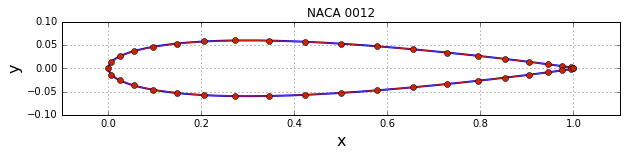

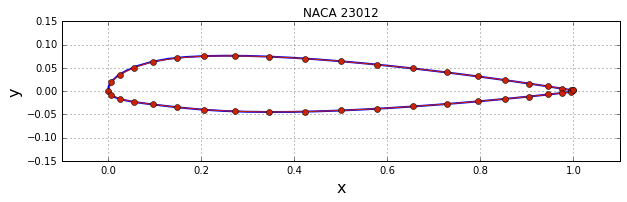

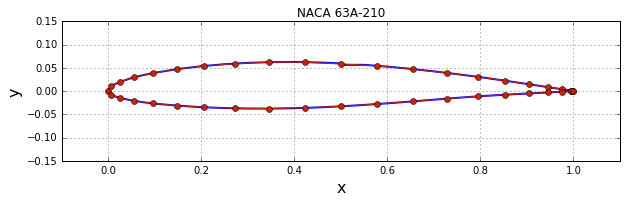

In [40]:
NACA_path_1 = numpy.loadtxt("../../AeroPython/lessons/resources/naca0012.dat")
x_1, y_1 = NACA_path_1[:,0], NACA_path_1[:,1]

NACA_path_2 = numpy.loadtxt("../../AeroPython/lessons/resources/naca23012.txt")
x_2, y_2 = NACA_path_2[:,0], NACA_path_2[:,1]

NACA_path_3 = numpy.loadtxt("../../AeroPython/lessons/resources/naca63a210.txt")
x_3, y_3 = NACA_path_3[:,0], NACA_path_3[:,1]

N = 40                                  # number of panels
panels_1 = define_panels(x_1, y_1, N)   # discretizes of the geometry into panels
panels_2 = define_panels(x_2, y_2, N)
panels_3 = define_panels(x_3, y_3, N)

# plot the geometry and the panels
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('NACA 0012')
pyplot.plot(x_1, y_1, color='b', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels_1], panels_1[0].xa),
            numpy.append([panel.ya for panel in panels_1], panels_1[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);

width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('NACA 23012')
pyplot.plot(x_2, y_2, color='b', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels_2], panels_2[0].xa),
            numpy.append([panel.ya for panel in panels_2], panels_2[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.15, 0.15);

width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.title('NACA 63A-210')
pyplot.plot(x_3, y_3, color='b', linestyle='-', linewidth=2)
pyplot.plot(numpy.append([panel.xa for panel in panels_3], panels_3[0].xa),
            numpy.append([panel.ya for panel in panels_3], panels_3[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.15, 0.15);

In [41]:
class Freestream:

    def __init__(self, u_inf, alpha):
        
        self.u_inf = u_inf
        self.alpha = alpha*math.pi/180          # degrees --> radians
        
def integral(x, y, panel, dxdz, dydz):
   
    def integrand(s):
        return ( ((x - (panel.xa - math.sin(panel.beta)*s))*dxdz
                  +(y - (panel.ya + math.cos(panel.beta)*s))*dydz)
                / ((x - (panel.xa - math.sin(panel.beta)*s))**2
                   +(y - (panel.ya + math.cos(panel.beta)*s))**2) )
    return integrate.quad(integrand, 0.0, panel.length)[0]

def source_contribution_normal(panels):
    
    A = numpy.empty((panels.size, panels.size), dtype=float)
    # source contribution on a panel from itself
    numpy.fill_diagonal(A, 0.5)
    # source contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = 0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                panel_j,
                                                numpy.cos(panel_i.beta),
                                                numpy.sin(panel_i.beta))
    return A

def vortex_contribution_normal(panels):
    
    A = numpy.empty((panels.size, panels.size), dtype=float)
    # vortex contribution on a panel from itself
    numpy.fill_diagonal(A, 0.0)
    # vortex contribution on a panel from others
    for i, panel_i in enumerate(panels):
        for j, panel_j in enumerate(panels):
            if i != j:
                A[i, j] = -0.5/numpy.pi*integral(panel_i.xc, panel_i.yc, 
                                                 panel_j,
                                                 numpy.sin(panel_i.beta),
                                                 -numpy.cos(panel_i.beta))
    return A

In [42]:
# define and creates the object freestream
u_inf = 1.0                                # freestream speed
alpha = 4.0                                # angle of attack (in degrees)
freestream = Freestream(u_inf, alpha)      # instantiation of the object freestream

A_source_1 = source_contribution_normal(panels_1)
B_vortex_1 = vortex_contribution_normal(panels_1)

A_source_2 = source_contribution_normal(panels_2)
B_vortex_2 = vortex_contribution_normal(panels_2)

A_source_3 = source_contribution_normal(panels_3)
B_vortex_3 = vortex_contribution_normal(panels_3)

In [43]:
def kutta_condition(A_source, B_vortex):
    
    b = numpy.empty(A_source.shape[0]+1, dtype=float)
    # matrix of source contribution on tangential velocity
    # is the same than
    # matrix of vortex contribution on normal velocity
    b[:-1] = B_vortex[0, :] + B_vortex[-1, :]
    # matrix of vortex contribution on tangential velocity
    # is the opposite of
    # matrix of source contribution on normal velocity
    b[-1] = - numpy.sum(A_source[0, :] + A_source[-1, :])
    return b

def build_singularity_matrix(A_source, B_vortex):
    
    A = numpy.empty((A_source.shape[0]+1, A_source.shape[1]+1), dtype=float)
    # source contribution matrix
    A[:-1, :-1] = A_source
    # vortex contribution array
    A[:-1, -1] = numpy.sum(B_vortex, axis=1)
    # Kutta condition array
    A[-1, :] = kutta_condition(A_source, B_vortex)
    return A

def build_freestream_rhs(panels, freestream):
    
    b = numpy.empty(panels.size+1,dtype=float)
    # freestream contribution on each panel
    for i, panel in enumerate(panels):
        b[i] = -freestream.u_inf * numpy.cos(freestream.alpha - panel.beta)
    # freestream contribution on the Kutta condition
    b[-1] = -freestream.u_inf*( numpy.sin(freestream.alpha-panels[0].beta)
                               +numpy.sin(freestream.alpha-panels[-1].beta) )
    return b

In [44]:
A_1 = build_singularity_matrix(A_source_1, B_vortex_1)
b_1 = build_freestream_rhs(panels_1, freestream)

A_2 = build_singularity_matrix(A_source_2, B_vortex_2)
b_2 = build_freestream_rhs(panels_2, freestream)

A_3 = build_singularity_matrix(A_source_3, B_vortex_1)
b_3 = build_freestream_rhs(panels_3, freestream)

# solve for singularity strengths
strengths_1 = numpy.linalg.solve(A_1, b_1)
strengths_2 = numpy.linalg.solve(A_2, b_2)
strengths_3 = numpy.linalg.solve(A_3, b_3)

# store source strength on each panel
for i , panel in enumerate(panels_1):
    panel.sigma_1 = strengths_1[i]
for i , panel in enumerate(panels_2):
    panel.sigma_2 = strengths_2[i]
for i , panel in enumerate(panels_3):
    panel.sigma_3 = strengths_3[i]
    
# store circulation density
gamma_1 = strengths_1[-1]
gamma_2 = strengths_2[-1]
gamma_3 = strengths_3[-1]

# compute the chord and lift coefficient
c_1 = abs(max(panel.xa for panel in panels_1)
        - min(panel.xa for panel in panels_1))
c_2 = abs(max(panel.xa for panel in panels_2)
        - min(panel.xa for panel in panels_2))
c_3 = abs(max(panel.xa for panel in panels_3)
        - min(panel.xa for panel in panels_3))

cl_NACA0012 = (gamma_1*sum(panel.length for panel in panels_1)
      / (0.5*freestream.u_inf*c_1))
print('lift coefficient: CL_NACA0012 = {:0.3f}'.format(cl_NACA0012))
cl_NACA23012 = (gamma_1*sum(panel.length for panel in panels_2)
      / (0.5*freestream.u_inf*c_2))
print('lift coefficient: CL_NACA23012 = {:0.3f}'.format(cl_NACA23012))
cl_NACA63A210 = (gamma_1*sum(panel.length for panel in panels_3)
      / (0.5*freestream.u_inf*c_3))
print('lift coefficient: CL_NACA63A210 = {:0.3f}'.format(cl_NACA63A210))

lift coefficient: CL_NACA0012 = 0.506
lift coefficient: CL_NACA23012 = 0.507
lift coefficient: CL_NACA63A210 = 0.503


As we can see the calculation results above, the Five-digit NACA airfoil has the biggist lift coefficient. But remember when we use the panel method to calculate the lift or the drag of airfoils, the condition is more like an ideal condition and this condition has limitations. Thus, we can not directly get the conclusion. We need use XFLR5 to do the further analysis.

### Step 2

At this stage, I will use XFLR5 to analyze these three types of airfoils from the relationships between lift coefficient and angle of attack and lift-to-drag ratio and angle of attack.

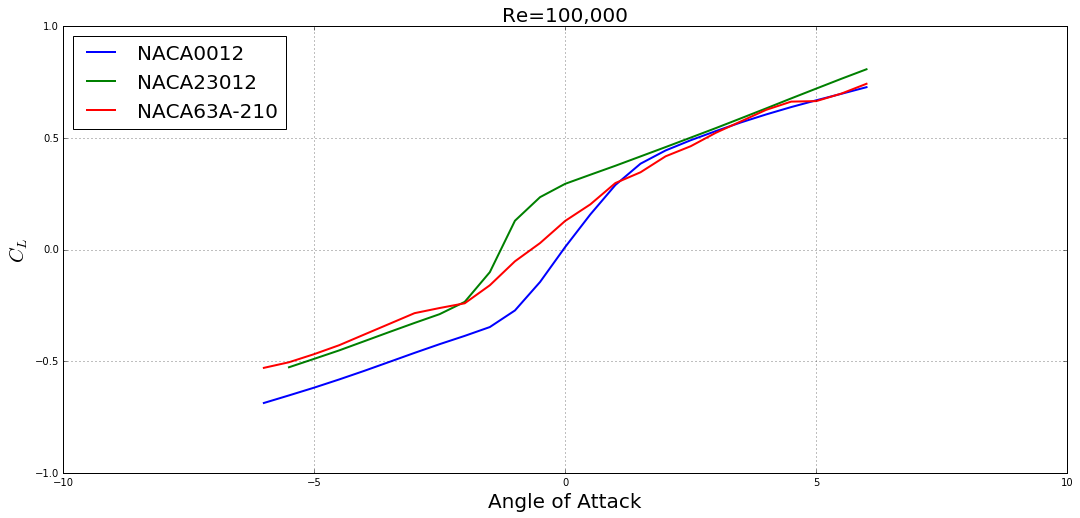

In [45]:
alpha_1, cl_1 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA0012_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
alpha_2, cl_2 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA23012_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
alpha_3, cl_3 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA63a210_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)

pyplot.figure(figsize=(18, 8))
pyplot.grid()
pyplot.xlabel('Angle of Attack', fontsize=20)
pyplot.ylabel('$C_L$', fontsize=20)

pyplot.plot(alpha_1, cl_1, label= 'NACA0012',
            color='b', linestyle='-', linewidth=2)
pyplot.plot(alpha_2, cl_2, label= 'NACA23012',
            color='g', linestyle='-', linewidth=2)
pyplot.plot(alpha_3, cl_3, label= 'NACA63A-210',
            color='r', linestyle='-', linewidth=2)

pyplot.legend(loc='best', prop={'size':20})
pyplot.xlim(-10, 10)
pyplot.ylim(-1, 1)
pyplot.title('Re=100,000',fontsize=20);

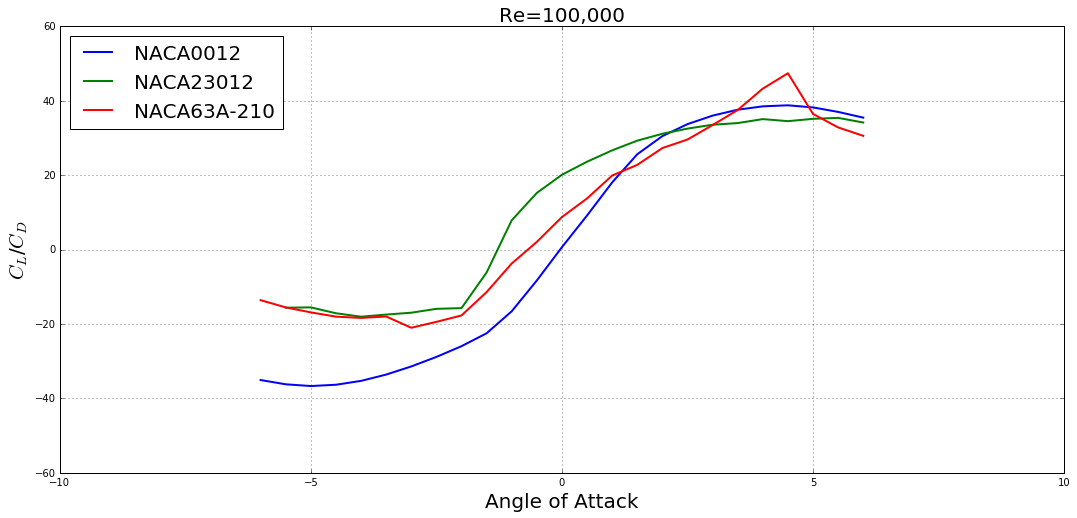

In [46]:
alpha_4, cl_cd_1 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA0012_clcd_alpha.csv", dtype=float, delimiter=',', unpack=True)
alpha_5, cl_cd_2 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA23012_clcd_alpha.csv", dtype=float, delimiter=',', unpack=True)
alpha_6, cl_cd_3 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA63a210_clcd_alpha.csv", dtype=float, delimiter=',', unpack=True)

pyplot.figure(figsize=(18, 8))
pyplot.grid()
pyplot.xlabel('Angle of Attack', fontsize=20)
pyplot.ylabel('$C_L$/$C_D$', fontsize=20)

pyplot.plot(alpha_4, cl_cd_1, label= 'NACA0012',
            color='b', linestyle='-', linewidth=2)
pyplot.plot(alpha_5, cl_cd_2, label= 'NACA23012',
            color='g', linestyle='-', linewidth=2)
pyplot.plot(alpha_6, cl_cd_3, label= 'NACA63A-210',
            color='r', linestyle='-', linewidth=2)

pyplot.legend(loc='best', prop={'size':20})
pyplot.xlim(-10, 10)
pyplot.ylim(-60, 60)
pyplot.title('Re=100,000',fontsize=20);

From the two images above, we can find out that the NACA0012 airfoil has the lowest maximum lift coefficient and has relatively high drag coefficient. The NACA23012 airfoil has the best lift coefficient in this AoA scale but the lift-to-drag ratio becomes the lowest after the angle of attack is larger than about 3 degrees. Therefore, its drag coefficient is very big. The NACA64A-210 airfoil has good lift coefficient and relatively low drag over a small range of operating conditions. Thus, its lift-to-ratio is much higher than others in a small scale then going down drastically.  

### Step 3

At this stage, I will choose more airfoils that in the same series. Then plot the results to show the effects of ailfoil factors on the performance of airfoil.   

#### Four-digit NACA airfoils

For the Four-digit NACA airfoils, I choose NACA0006, NACA0012, NACA0018 and NACA4412 airfoils to make contrast. NACA4412 airfoil has the biggest maximum camber and its position of the maximum camber is the best though the maximum thickness of the NACA4412 airfoil in percentage of chord is only 12%. The maximu camber and the position of the maximum camber are the same in NACA0006, NACA0012 and NACA0018 airfoils. The maximum thickness of the NACA0018 airfoil is bigger than the NACA0006 and the NACA0012 airfoils.

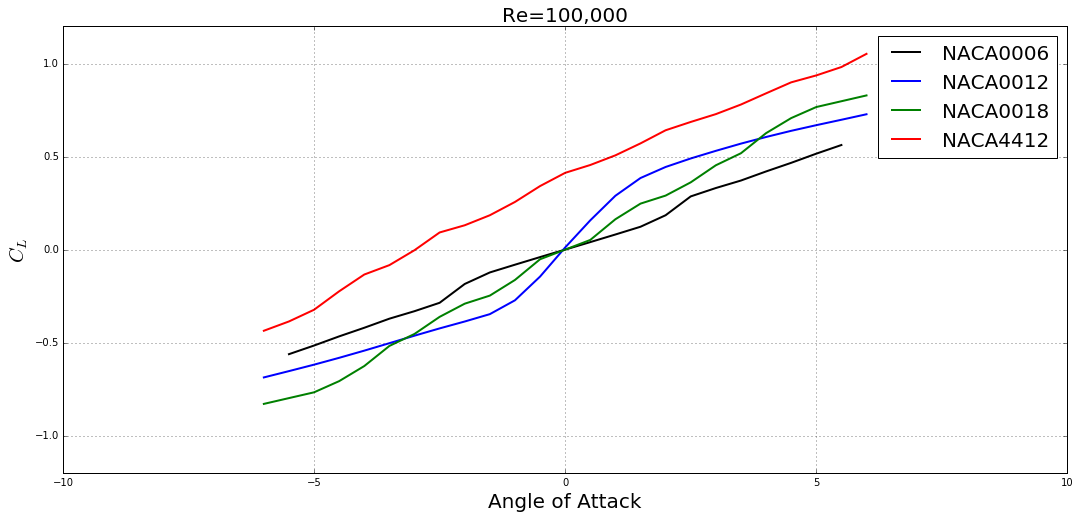

In [47]:
Alpha_0, Cl_0 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA0006_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_1, Cl_1 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA0012_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_2, Cl_2 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA0018_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_3, Cl_3 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA4412_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)

pyplot.figure(figsize=(18, 8))
pyplot.grid()
pyplot.xlabel('Angle of Attack', fontsize=20)
pyplot.ylabel('$C_L$', fontsize=20)

pyplot.plot(Alpha_0, Cl_0, label= 'NACA0006',
            color='k', linestyle='-', linewidth=2)
pyplot.plot(Alpha_1, Cl_1, label= 'NACA0012',
            color='b', linestyle='-', linewidth=2)
pyplot.plot(Alpha_2, Cl_2, label= 'NACA0018',
            color='g', linestyle='-', linewidth=2)
pyplot.plot(Alpha_3, Cl_3, label= 'NACA4412',
            color='r', linestyle='-', linewidth=2)

pyplot.legend(loc='best', prop={'size':20})
pyplot.xlim(-10, 10)
pyplot.ylim(-1.2, 1.2)
pyplot.title('Re=100,000',fontsize=20);

From the results of image above, we can find out that the NACA4412 airfoil has the best maximum lift coefficient. The lift coefficient of the NACA0018 airfoil is almost equal to the NACA0012 airfoil. The NACA0006 airfoil has the lowset lift coefficient.

#### Five-digit NACA airfoils

For the Five-digit NACA airfoils, I choose NACA16012, NACA16018 and NACA23012 airfoils to make contrast. The NACA23012 airfoil has the best ideal lift coefficient. The maximum thickness-to-chord ratioes of these airfoils are between 12% and 18%. The NACA16006 has the lowest maximum thickness-to-chord ratio. Let us look at the results.

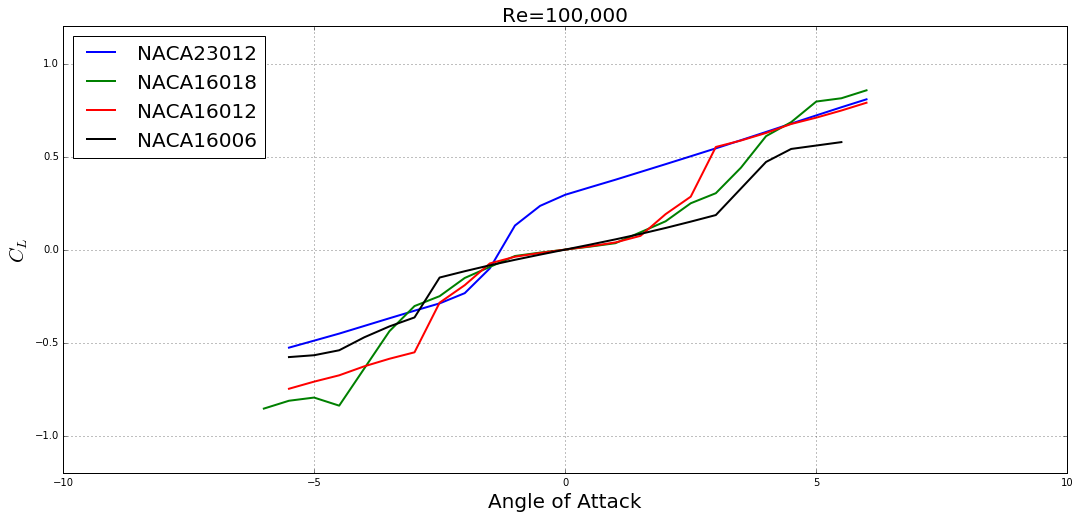

In [48]:
Alpha_4, Cl_4 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA23012_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_5, Cl_5 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA16018_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_6, Cl_6 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA16012_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_7, Cl_7 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA16006_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)

pyplot.figure(figsize=(18, 8))
pyplot.grid()
pyplot.xlabel('Angle of Attack', fontsize=20)
pyplot.ylabel('$C_L$', fontsize=20)

pyplot.plot(Alpha_4, Cl_4, label= 'NACA23012',
            color='b', linestyle='-', linewidth=2)
pyplot.plot(Alpha_5, Cl_5, label= 'NACA16018',
            color='g', linestyle='-', linewidth=2)
pyplot.plot(Alpha_6, Cl_6, label= 'NACA16012',
            color='r', linestyle='-', linewidth=2)
pyplot.plot(Alpha_7, Cl_7, label= 'NACA16006',
            color='k', linestyle='-', linewidth=2)

pyplot.legend(loc='best', prop={'size':20})
pyplot.xlim(-10, 10)
pyplot.ylim(-1.2, 1.2)
pyplot.title('Re=100,000',fontsize=20);

As we can see above, the lift coefficient of the NACA23012 airfoil is much more than the others over a scale. The lift coefficient of the NACA16012 airfoil is still almost equal to the NACA16018 airfoil and both are bigger than the NACA16006 airfoil.

#### 6-series NACA airfoils

For 6-series NACA airfoils, I choose the NACA63A-210, NACA64A-210 and NACA633-218 airfoils for comparison. The ideal lift coefficients of the first two airfoils are bigger than the last one. But NACA633-218 has the best maximum thickness-to-chord ratio.

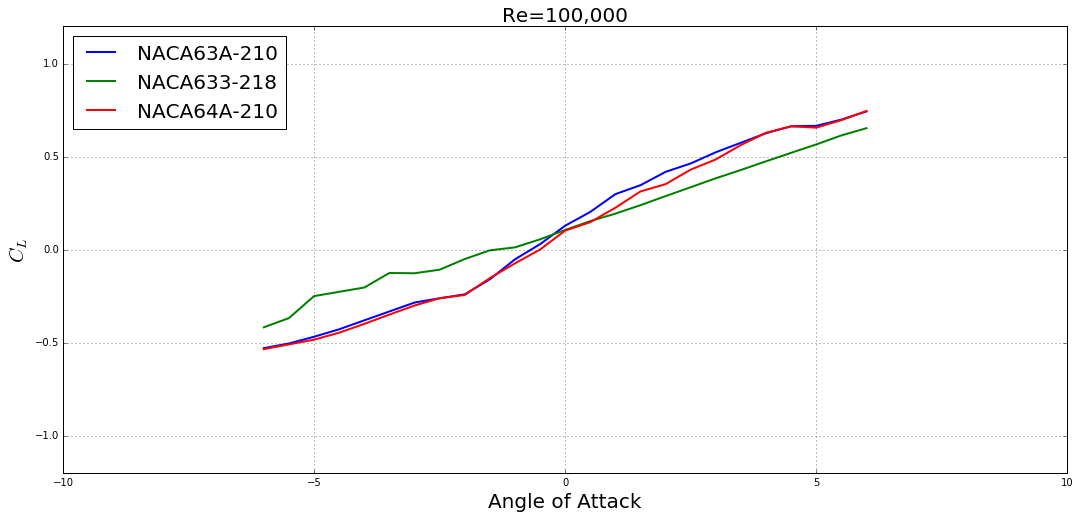

In [49]:
Alpha_8, Cl_8 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA63a210_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_9, Cl_9 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA633218_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)
Alpha_10, Cl_10 = numpy.loadtxt("../../AeroPython/lessons/resources/NACA64a210_cl_alpha.csv", dtype=float, delimiter=',', unpack=True)

pyplot.figure(figsize=(18, 8))
pyplot.grid()
pyplot.xlabel('Angle of Attack', fontsize=20)
pyplot.ylabel('$C_L$', fontsize=20)

pyplot.plot(Alpha_8, Cl_8, label= 'NACA63A-210',
            color='b', linestyle='-', linewidth=2)
pyplot.plot(Alpha_9, Cl_9, label= 'NACA633-218',
            color='g', linestyle='-', linewidth=2)
pyplot.plot(Alpha_10, Cl_10, label= 'NACA64A-210',
            color='r', linestyle='-', linewidth=2)

pyplot.legend(loc='best', prop={'size':20})
pyplot.xlim(-10, 10)
pyplot.ylim(-1.2, 1.2)
pyplot.title('Re=100,000',fontsize=20);

From the results above, we can find out that the lift coefficient of the NACA63A-210 airfoil is almost euqal to the NACA64A-210 airfoil. The NACA633-218 airfoil has the lowest lift coefficient.

## Conclusions

1.In these three types of NACA series airfoils:

* The Four-digit NACA airfoil has low maximum lift coefficient and  relatively high drag. Thus, the lift-to-drag ratio is very low. 

* The Five-digit NACA airfoil has the best maximum lift coefficient but relatively high drag, the lift-to-drag ratio is still not very high. 

* The maximum lift coefficient of 6-series NACA airfoil is high and its drag is still very low. Therefore, the lift-to-darg ratio of 6-series NACA airfoil is the best within these three types of NACA series airfoils.


Adapted from Aircraft Design: A Systems Engineering Approach(2012), chapter 5, figure 5.23, page 200

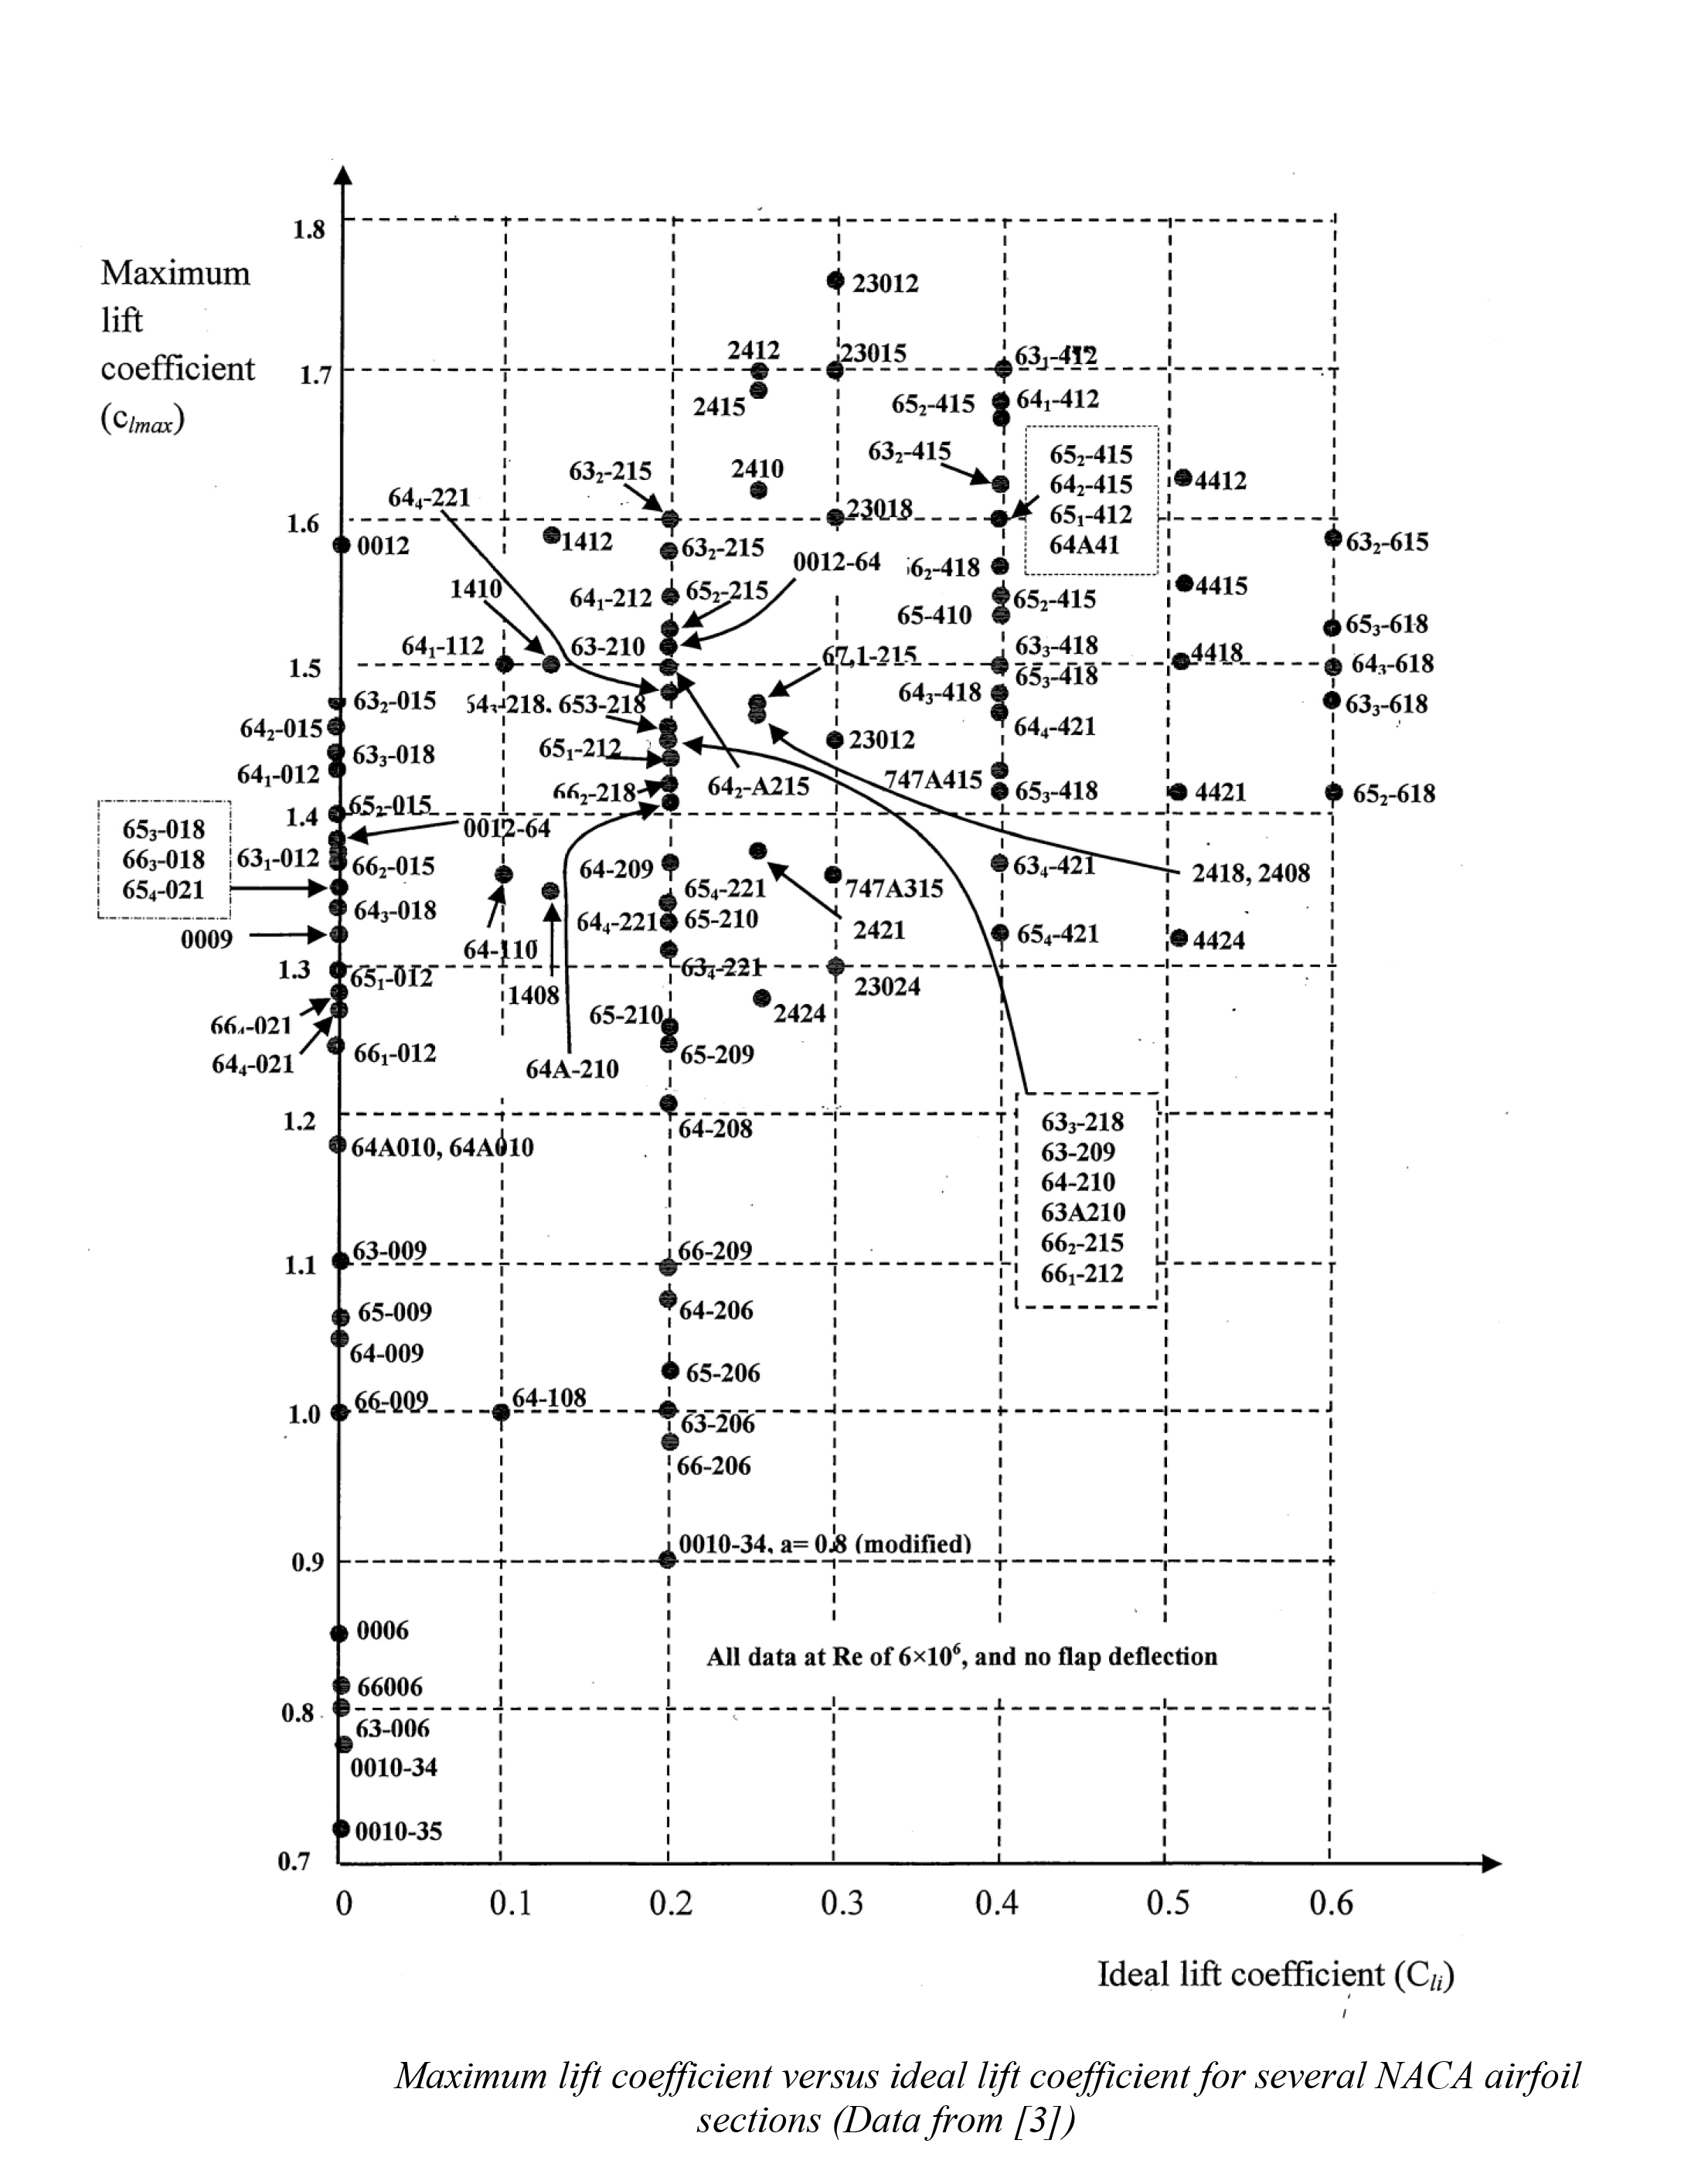

In [50]:
Image(filename="../../AeroPython/lessons/resources/CL.jpg")

2.The relationship between maximum lift coefficient and geometric parameters:

* The ideal lift coefficient: this factor of airfoil has a strong effect on maximum lift coefficient. The larger the ideal lift coefficient, the greater the maximum lift coefficient.

* The maximum thickness of the airfoil: the maximum lift coefficient of airfoil is the best when the maximum thickness is between 12% and 18%.

* The maximum camber and its position: the maximum lift coefficient will increase if the maximum camber becomes larger.

* The effect of ideal lift coefficient on airfoil is larger than the effect of maximum thickness on the airfoil.

## Limitations

Due to my programming skill is limited and the number of airfoils chosen is not very large, the analysis results of some details are not very accurate. 

## References

* Sadraey, M. Aircraft Design: A Systems Engineering Approach, Wiley Publications, 2012.

* Anderson J. D., Aircraft Performance and Design, McGraw-Hill, 1999.

* Raymer, D.P. A Conceptual Approach, AIAA Education Series, 2012.

* UIUC Airfoil Data Site.